# Supervised Learning

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import os

In [2]:
data_path = os.path.join(os.path.dirname(os.getcwd()), 'datasets')
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, data_home=data_path)
print('data:', X.shape, ',', 'labels:', y.shape)

data: (70000, 784) , labels: (70000,)


### Exploring the data

classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
classes counts: [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]
X_imgs: (70000, 28, 28)


Text(0.5, 1.0, '3')

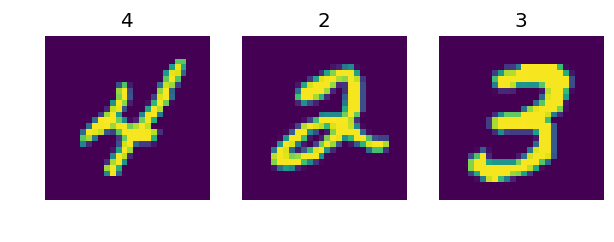

In [4]:
unique_labels, counts = np.unique(y, return_counts=True)
num_classes = len(unique_labels)
print('classes:', unique_labels)
print('classes counts:', counts)

X_imgs = X.reshape(-1,28,28)
print('X_imgs:', X_imgs.shape)

idx1, idx2, idx3 = np.random.randint(0, num_classes, 3)

fig, ax = plt.subplots(1, 3, dpi=120)
ax[0].imshow(X_imgs[idx1]); ax[1].imshow(X_imgs[idx2]); ax[2].imshow(X_imgs[idx3]);
ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off');
ax[0].set_title(str(y[idx1])); ax[1].set_title(str(y[idx2])); ax[2].set_title(str(y[idx3]))

## Nearest Neighbors

### Train-Test Split

In [5]:
n_train_pc = 20 # number of train samples per class
n_test_pc = 1 # number of test samples per class

n_train = n_train_pc * num_classes
n_test = n_test_pc * num_classes

train_data = np.zeros((num_classes,n_train_pc,784))
train_labels = np.zeros((num_classes,n_train_pc))

test_data = np.zeros((num_classes,n_test_pc,784))
test_labels = np.zeros((num_classes,n_test_pc))

for l_idx, l in enumerate(unique_labels):
    idxs = np.squeeze(np.argwhere(y == l))
    idxs = np.random.choice(idxs, n_train_pc + n_test_pc, replace=False)
    
    train_data[l_idx] = X[idxs[:n_train_pc]]
    train_labels[l_idx] = y[idxs[:n_train_pc]]
    
    test_data[l_idx] = X[idxs[n_train_pc:]]
    test_labels[l_idx] = y[idxs[n_train_pc:]]
    
# ravel the data
train_data = train_data.reshape(-1,784)
train_labels = np.ravel(train_labels).astype(np.int)

test_data = test_data.reshape(-1,784)
test_labels = np.ravel(test_labels).astype(np.int)

# shuffle the data
train_idxs = np.arange(len(train_data))
_ = np.random.shuffle(train_idxs)

train_data = train_data[train_idxs]
train_labels = train_labels[train_idxs]

test_idxs = np.arange(len(test_data))
_ = np.random.shuffle(test_idxs)

test_data = test_data[test_idxs]
test_labels = test_labels[test_idxs]

print('train data:', train_data.shape, ',', 'train labels:', train_labels.shape)
print('test data:', test_data.shape, ',', 'test labels:', test_labels.shape)

train data: (200, 784) , train labels: (200,)
test data: (10, 784) , test labels: (10,)


### k-NN classification

In [29]:
squared_diff = (test_data[:,np.newaxis,:] - train_data[np.newaxis, ...]) ** 2
sum_squared_diff = np.sum(squared_diff, axis=-1)
euclidean_distance = np.sqrt(sum_squared_diff)

print('sqaured_diff:', squared_diff.shape, ',', 'sum_squared_diff:', sum_squared_diff.shape, ',',     
      'euclidean_distance:', euclidean_distance.shape)

k = 5 # number of nearest neighbors (number of votes)
sort_idxs = np.argsort(euclidean_distance, axis=-1)
voting_idxs = sort_idxs[:,:k]

print('sort_idxs:', sort_idxs.shape, ',', 'voting_idxs:', voting_idxs.shape)

k_predicted_labels = train_labels[voting_idxs]
print('\nk_predicted_labels:\n', k_predicted_labels)

votes = np.zeros((n_test,num_classes))
test_sample_idxs = np.arange(n_test).reshape(-1,1)
_ = np.add.at(votes, (test_sample_idxs, k_predicted_labels), 1)
print('\nvotes:\n', votes, '\n')

predicted_labels = np.argmax(votes, axis=1)
print('predicted_labels:', predicted_labels, '\ntest_labels:     ', test_labels)

sqaured_diff: (10, 200, 784) , sum_squared_diff: (10, 200) , euclidean_distance: (10, 200)
sort_idxs: (10, 200) , voting_idxs: (10, 5)

k_predicted_labels:
 [[6 6 6 6 6]
 [4 1 1 1 1]
 [7 7 7 5 7]
 [0 0 6 0 5]
 [1 1 1 1 1]
 [5 6 5 6 5]
 [8 8 8 3 8]
 [2 2 2 2 2]
 [3 5 3 5 5]
 [9 4 9 7 9]]

votes:
 [[0. 0. 0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 4. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 4. 0. 0.]
 [3. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 2. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 4. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 3.]] 

predicted_labels: [6 1 7 0 1 5 8 2 5 9] 
test_labels:      [6 4 7 0 1 5 8 2 3 9]


### k-NN classification using scikitlearn

In [30]:
from sklearn.neighbors.classification import KNeighborsClassifier 

kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(train_data, train_labels)

predicted_labels_sklearn = kNN.predict(test_data)

### Evaluation

In [35]:
num_correct_ours = np.sum(predicted_labels == test_labels)
accuracy_ours = num_correct / n_test

num_correct_sklearn = np.sum(predicted_labels_sklearn == test_labels)
accuracy_sklearn = num_correct / n_test

print('num_correct_ours:', num_correct_ours, ',', 'accuracy_ours:', accuracy_ours)
print('num_correct_sklearn:', num_correct_sklearn, ',', 'accuracy_sklearn:', accuracy_sklearn)

num_correct_ours: 8 , accuracy_ours: 0.8
num_correct_sklearn: 9 , accuracy_sklearn: 0.8


(200, 2)
(10, 2)


Text(0.5, 1.0, 'first two principal components of train and test data of labels [6, 1]')

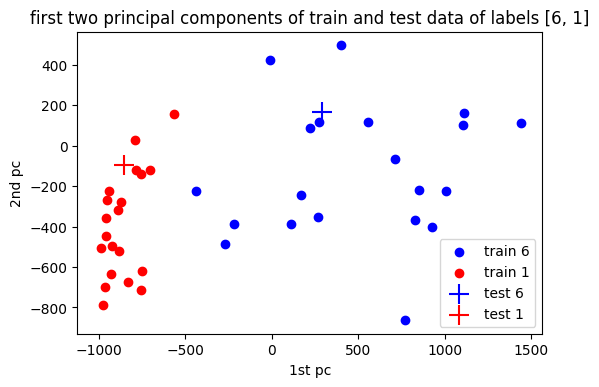

In [40]:
from sklearn.decomposition import PCA

# apply PCA for dimensionality reduction
pca = PCA(n_components=2)

pc_train = pca.fit_transform(train_data)
print(pc_train.shape)

pc_test = pca.transform(test_data)
print(pc_test.shape)

vis_labels = [6,1]

vis_train_l1 = pc_train[train_labels == vis_labels[0]]
vis_train_l2 = pc_train[train_labels == vis_labels[1]]

vis_test_l1 = pc_test[test_labels == vis_labels[0]]
vis_test_l2 = pc_test[test_labels == vis_labels[1]]

fig = plt.figure(dpi=100)
plt.scatter(vis_train_l1[:,0], vis_train_l1[:,1], c='b', label='train ' + str(vis_labels[0]))
plt.scatter(vis_train_l2[:,0], vis_train_l2[:,1], c='r', label='train ' + str(vis_labels[1])) 

plt.scatter(vis_test_l1[:,0], vis_test_l1[:,1], c='b', s=200, marker='+', label='test ' + str(vis_labels[0]))
plt.scatter(vis_test_l2[:,0], vis_test_l2[:,1], c='r', s=200, marker='+', label='test ' + str(vis_labels[1])) 

plt.legend()
plt.xlabel('1st pc')
plt.ylabel('2nd pc')
plt.title('first two principal components of train and test data of labels ' + str(vis_labels))